## Session7 - playground (optional)

Here you can try doing the full machine learning workflow by yourself.

You are free to use any dataset (but make sure it is a classification problem).
<br>
A good place to find datasets for trying out is the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). 
<br>
Other places to look for datasets are [Kaggle](https://www.kaggle.com/datasets), [Amazon AWS](https://registry.opendata.aws/), or check the [list on Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research).

(Note that some datasets might not be in CSV format, so you may have to to preprocess the data.)

ここでは、最初から最後までの機械学習ワークフローを自分で試すことができます。

任意のデータセットを自由に使用できます（ただし、分類問題であることを確認してください）。
<br>
練習用のデータセットを見つけるのに適した場所は、 [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php)です。
<br>
それ以外、データセットを探す場所は、 [Kaggle](https://www.kaggle.com/datasets)、[Amazon AWS](https://registry.opendata.aws/)などがあります。または[ウィキペディアのリスト](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)を確認してください。

（データセットはCSV形式でない場合があるため、データの前処理が必要になる場合があります。）

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## OPTIONAL 1 - Get the data / データの取得

- Download the data file to the same folder as this notebook (.../day2/)
- Load the data


- データファイルをこのノートブックと同じフォルダにダウンロード（.../day2/）
- データの読み込み

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)  
Length / continuous / mm / Longest shell measurement  
Diameter / continuous / mm / perpendicular to length  
Height / continuous / mm / with meat in shell  
Whole weight / continuous / grams / whole abalone  
Shucked weight / continuous / grams / weight of meat  
Viscera weight / continuous / grams / gut weight (after bleeding)  
Shell weight / continuous / grams / after being dried  
Rings / integer / -- / +1.5 gives the age in years  

In [3]:
data = np.genfromtxt('abalone.csv', delimiter=',',  encoding="utf-8")
data[:0]

array([], shape=(0, 9), dtype=float64)

In [4]:
data[:,1]

array([0.455, 0.35 , 0.53 , ..., 0.6  , 0.625, 0.71 ])

## OPTIONAL 2 - Explore the data / データの探索

- Try plotting some values to see how the dataset looks like


- いくつかの値をプロットし、データがどのように見えるかを確認してください

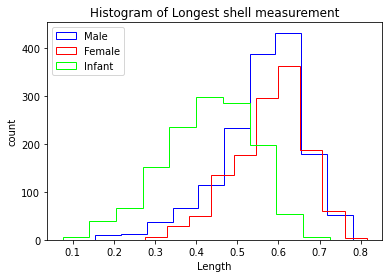

In [5]:
## YOUR CODE HERE
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.hist(data[data[:,0] == 1,1], histtype='step', color=[0, 0, 1], label="Male")
plt.hist(data[data[:,0] == 2,1], histtype='step', color=[1, 0, 0], label="Female")
plt.hist(data[data[:,0] == 3,1], histtype='step', color=[0, 1, 0], label="Infant")
plt.xlabel("Length")
plt.ylabel("count")
plt.title("Histogram of Longest shell measurement")
plt.legend()

## OPTIONAL 3 - Prepare the data / データの準備

- Create a training and a testing set
- Standardize the data


- トレーニングとテストセットの作成
- データの標準化

In [6]:
## YOUR CODE HERE
X = data[1:1000,1:] # features
y = data[1:1000,0] # labels

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print("X train size:", X_train.shape[0], "  X test size:", X_test.shape[0])

# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X train size: 699   X test size: 300


## OPTIONAL 4 - Try several classifiers / いくつかの分類器を試す

- Suggestions: `LogisticRegression` or `SGDClassifier` from the `sklearn.linear_model` package, or `RandomForestClassifier` from the `sklearn.ensemble` package, etc.


- 提案：`sklearn.linear_model`パッケージ内の`LogisticRegression`か`SGDClassifier`、または`sklearn.ensemble`パッケージの`RandomForestClassifier`など

In [7]:
## YOUR CODE HERE
from sklearn.metrics import accuracy_score

##sklearn.linear_modelパッケージ内のLogisticRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_validate

# ロジスティック回帰
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.5133333333333333


In [8]:
## sklearn.ensembleパッケージのRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.48333333333333334


## OPTIONAL 5 - Make more detailed comparisons / より詳細な比較を行う

- Use cross validation to get a better idea of the performance of the different classifiers 
- Measure the computation time of each classifier


- 相互検証を使用して、さまざまな分類器のパフォーマンスをよりよく理解する
- それぞれの分類器の計算時間を測定する

In [11]:
## YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import timeit # 実行時間を計測するためのライブラリ

# ロジスティック回帰
clf = LogisticRegression(max_iter=1500)
time = timeit.timeit(lambda: clf.fit(X_train, y_train), number=1)
print('Time: {}'.format(time))

#評価
score = clf.score(X_test, y_test)
print('Test set score: {}'.format(score))

#cross validation
scores = cross_val_score(clf, X, y)

# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Time: 0.027135041000008187
Test set score: 0.5133333333333333
Cross-Validation scores: [0.515      0.475      0.355      0.46       0.55276382]
Average score: 0.4715527638190954


## エラー解決方法
エラー内容：STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.  
エラー原因：LogisticRegressionの最大反復回数に達しなかった  
エラー解決：最大反復回数をmax_iterで設定、デフォルトの1000より大きい数を設定する  
参考：https://qiita.com/tatsu2015/items/8f01c89aa053e12e63b2  